In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
cities

['ushuaia',
 'victoria',
 'atuona',
 'norman wells',
 'isangel',
 'east london',
 'taolanaro',
 'busselton',
 'georgetown',
 'albany',
 'kangundo',
 'lebu',
 'port-gentil',
 'yumen',
 'jamestown',
 'kuche',
 'flin flon',
 'harper',
 'mataura',
 'hambantota',
 'chumikan',
 'itoman',
 'port macquarie',
 'gushikawa',
 'bredasdorp',
 'port alberni',
 'sao filipe',
 'cape town',
 'tuktoyaktuk',
 'mar del plata',
 'puerto ayora',
 'mahadday weyne',
 'dagua',
 'caravelas',
 'vila velha',
 'klaksvik',
 'huarmey',
 'san cristobal',
 'richards bay',
 'fortuna',
 'cherskiy',
 'pangnirtung',
 'punta arenas',
 'gonda',
 'baykit',
 'lazaro cardenas',
 'provideniya',
 'avarua',
 'valley city',
 'rikitea',
 'vaini',
 'bangsund',
 'kruisfontein',
 'solotcha',
 'mosquera',
 'bethel',
 'kodiak',
 'kawalu',
 'talnakh',
 'komsomolskiy',
 'mogadishu',
 'macaboboni',
 'bengkulu',
 'alofi',
 'bluff',
 'mukono',
 'bathsheba',
 'amderma',
 'formosa do rio preto',
 'luganville',
 'walvis bay',
 'hermanus',
 'anc

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#Defining settings to display measurements in ft,in,Fahrenheit
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=eb1a4356ca606ab51709e730af7b4ae9&units=imperial&q='

In [6]:
print(requests.get(query_url + city))

<Response [200]>


In [7]:
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 19},
 'cod': 200,
 'coord': {'lat': -23.12, 'lon': -134.97},
 'dt': 1595172789,
 'id': 4030556,
 'main': {'feels_like': 63.32,
          'grnd_level': 1014,
          'humidity': 74,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 68.63,
          'temp_max': 68.63,
          'temp_min': 68.63},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1595173154, 'sunset': 1595212369},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 15.26}}


# API's & Exception Handling

In [8]:
# Set up lists to hold reponse info

city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & get data for each
for city in cities:
    try:
        
        response = requests.get(query_url + city).json()
        print(f"City {city}  is in {response['sys']['country']}.")
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
    except (KeyError, IndexError):
        print(f"Error.Skipping...")
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"----------------------------")

        

Beginning Data Retrieval
-------------------------------
City ushuaia  is in AR.
City victoria  is in HK.
City atuona  is in PF.
City norman wells  is in CA.
City isangel  is in VU.
City east london  is in ZA.
Error.Skipping...
City busselton  is in AU.
City georgetown  is in MY.
City albany  is in US.
City kangundo  is in KE.
City lebu  is in CL.
City port-gentil  is in GA.
City yumen  is in CN.
City jamestown  is in US.
Error.Skipping...
City flin flon  is in CA.
City harper  is in LR.
City mataura  is in NZ.
City hambantota  is in LK.
City chumikan  is in RU.
City itoman  is in JP.
City port macquarie  is in AU.
City gushikawa  is in JP.
City bredasdorp  is in ZA.
City port alberni  is in CA.
City sao filipe  is in CV.
City cape town  is in ZA.
City tuktoyaktuk  is in CA.
City mar del plata  is in AR.
City puerto ayora  is in EC.
Error.Skipping...
City dagua  is in CO.
City caravelas  is in BR.
City vila velha  is in BR.
City klaksvik  is in FO.
City huarmey  is in PE.
City san cris

In [9]:
# create a data frame 
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date":date,
    "Lat": latitude,
    "Longt":longitude,
    "Temp": max_temperature,
    "Humidity":humidity, 
    "Cloudiness":cloudiness, 
    "Wind Speed":wind_speed     
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Country,Date,Lat,Longt,Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,1595172790,-54.80,-68.30,30.20,92,75,6.93
1,Hong Kong,HK,1595172790,22.29,114.16,86.00,70,100,8.99
2,Atuona,PF,1595172560,-9.80,-139.03,78.96,73,90,13.89
3,Norman Wells,CA,1595172790,65.28,-126.83,53.60,87,75,9.17
4,Isangel,VU,1595172790,-19.55,169.27,67.98,67,7,6.91
...,...,...,...,...,...,...,...,...,...
547,Pallipattu,IN,1595172872,13.34,79.44,86.00,70,20,3.36
548,Dicabisagan,PH,1595172872,17.08,122.42,79.99,78,35,0.89
549,Mazamari,PE,1595172872,-11.33,-74.53,87.94,40,80,1.92
550,Grants,US,1595172801,35.15,-107.85,66.20,45,1,5.82


In [13]:
#Exporting as csv file
weather_data.to_csv('WeatherPy.csv', index = False)

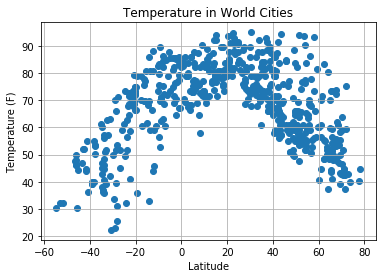

In [14]:
# Build a scatter plot for temperature and latitude 
plt.scatter(weather_data["Lat"], weather_data["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature vs Latitude.png")

# Show plot
plt.show()

## Analysis of the First Scatterplot
The relationship between temperature and latitude is parabolic.

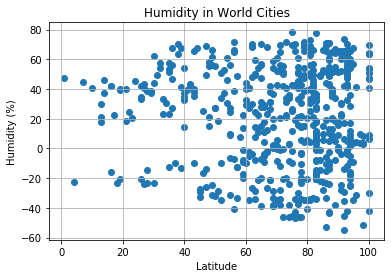

In [15]:
# Build a scatter plot for temperature and latitude 
plt.scatter(weather_data["Humidity"], weather_data["Lat"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity vs Latitude.png")

# Show plot
plt.show()

## Analysis of the Second Scatterplot
No relationship between humidity and latitude.

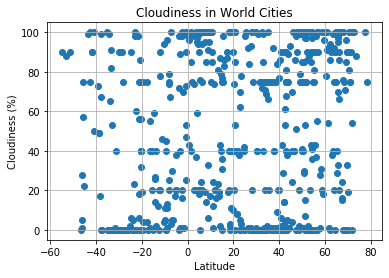

In [16]:
# Build a scatter plot for temperature and latitude 
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness vs Latitude.png")

# Show plot
plt.show()

## Analysis of the Third Scatterplot
No relationship between cloudiness and latitude

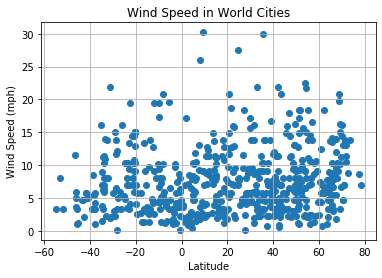

In [18]:
# Build a scatter plot for temperature and latitude 
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeed vs Latitude.png")

# Show plot
plt.show()

## Analysis of the Fourth Scatterplot
No strong relationship between wind speed and latitude.

# Linear Regression


In [20]:
#Splitting the data as separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
#Southern Hemisphere (less than 0 degrees latitude):
northern_sphere=weather_data.loc[weather_data['Lat'] >= 0]
northern_sphere

,City,Country,Date,Lat,Longt,Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,1594786875,71.69,128.87,42.53,73,0,11.41
6,Albany,US,1594786581,42.60,-73.97,69.01,75,53,2.93
8,Mazatán,MX,1594786876,14.87,-92.45,79.02,79,77,5.30
9,Dakar,SN,1594786876,14.69,-17.44,78.80,78,40,11.41
13,Riyadh,SA,1594786876,24.69,46.72,87.80,22,0,6.93
...,...,...,...,...,...,...,...,...,...
566,Yenagoa,NG,1594786939,4.92,6.26,73.78,93,100,5.44
567,Nieuwpoort,BE,1594786940,51.12,2.77,55.40,100,53,1.12
568,Middle Island,US,1594786940,40.88,-72.94,71.60,77,1,8.25
571,Tabou,CI,1594786940,4.42,-7.35,73.06,81,94,7.90


In [28]:
#Splitting the data as separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
#Southern Hemisphere (less than 0 degrees latitude):
southern_sphere=weather_data.loc[weather_data['Lat'] <0]
southern_sphere

,City,Country,Date,Lat,Longt,Temp,Humidity,Cloudiness,Wind Speed
1,Rikitea,PF,1594786875,-23.12,-134.97,72.55,86,100,9.40
2,Mar del Plata,AR,1594786875,-38.00,-57.56,39.99,74,0,3.36
3,Hermanus,ZA,1594786875,-34.42,19.23,37.00,95,0,11.30
4,Labuhan,ID,1594786598,-6.88,112.21,84.67,65,5,3.76
5,Emerald,AU,1594786875,-23.53,148.17,68.00,30,0,10.29
...,...,...,...,...,...,...,...,...,...
562,Iguatemi,BR,1594786939,-23.68,-54.56,56.61,74,23,3.51
563,Vila Velha,BR,1594786828,-20.33,-40.29,72.00,94,75,10.29
565,Santa Maria,BR,1594786939,-29.68,-53.81,33.80,77,0,3.09
569,Banjarmasin,ID,1594786940,-3.32,114.59,82.40,78,40,3.36


The r-squared is: 0.4265720448216606


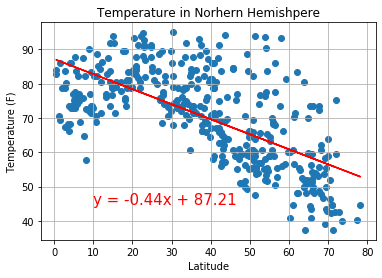

In [32]:
#Creating a scatterplot for Northern Hemisphere
x_values=northern_sphere["Lat"]
y_values=northern_sphere["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Temperature in Norhern Hemishpere")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature vs Latitude.png")

# Show plot
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis
The temperature in Nothern Hemishpere has a negative corraletion with the latitude, this makes sense since as one goes further to North pole, the temperatude decreases.

The r-squared is: 0.5497536609031116


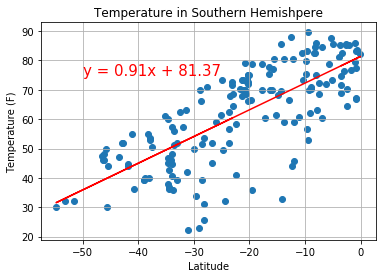

In [36]:
#Creating a scatterplot for Southern Hemisphere
x_values=southern_sphere["Lat"]
y_values=southern_sphere["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,75),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Temperature in Southern Hemishpere")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature vs Latitude.png")

# Show plot
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis
The temperature in Southern Hemishpere has a positive corraletion with the latitude, this makes sense since as one goes further to South pole closer to the equator , the temperatude increases.

The r-squared is: 0.005565036954481338


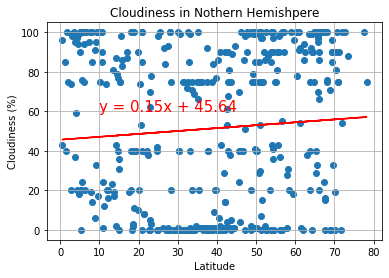

In [37]:
# Build a scatter plot for cloudiness and latitude  in Nothern Hemishpere

x_values=northern_sphere["Lat"]
y_values=northern_sphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Cloudiness in Nothern Hemishpere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature vs Latitude.png")

# Show plot
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis
The cloudiness in Nothern Hemishpere has a weak positive corraletion with the latitude.

The r-squared is: 1.0717506521682524e-05


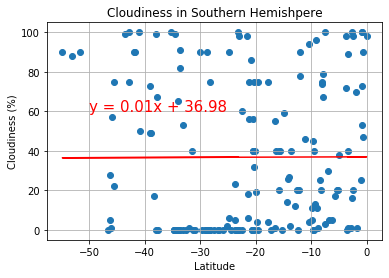

In [42]:
# Build a scatter plot for cloudiness and latitude  in Southern Hemishpere
x_values=southern_sphere["Lat"]
y_values=southern_sphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Cloudiness in Southern Hemishpere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature vs Latitude.png")

# Show plot
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis
The cloudiness in Southern Hemishpere has a weak positive corraletion with the latitude.

The r-squared is: 0.00946667762354613


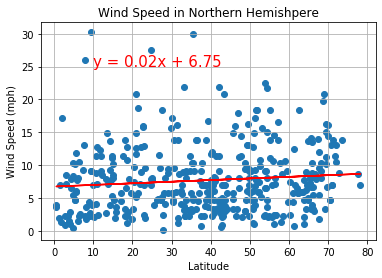

In [39]:
# Build a scatter plot for wind speed and latitude for Northern Hemishpere

x_values=northern_sphere["Lat"]
y_values=northern_sphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Wind Speed in Northern Hemishpere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature vs Latitude.png")

# Show plot
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis
The wind speed in Nothern Hemishpere has a weak positive corraletion with the latitude.

The r-squared is: 9.286980856977305e-06


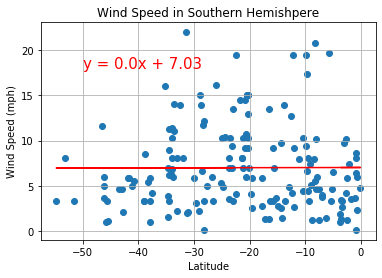

In [41]:
# Build a scatter plot for wind speed and latitude for Southern Hemishpere
x_values=southern_sphere["Lat"]
y_values=southern_sphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Wind Speed in Southern Hemishpere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature vs Latitude.png")

# Show plot
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis
The wind speed in Southern Hemishpere has a weak positive corraletion with the latitude.